In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
iowatrain = pd.read_csv('~/Desktop/HousingML/data/train.csv')

In [4]:
iowatrain.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

ValueError: x and y must be the same size

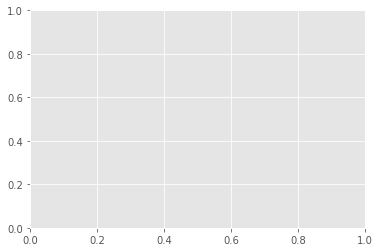

In [18]:
iowatrain.drop()